# Forest Fire Prediction

### Data Description and Cleaning

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [2]:
df = pd.read_csv('ForestFire.csv')
df['Fire Occurrence'] = df['Fire Occurrence'].replace([0,1],['Safe','Fire'])

DataFrame Shape

In [3]:
df.shape

(39, 5)

Sample

In [4]:
df.sample(5)

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
7,Amsterdam,5,20,70,Safe
3,Ahmedabad,60,45,70,Fire
0,Jharkand,40,45,20,Fire
24,Damascus,78,49,8,Fire
5,Cairo,50,15,30,Safe


Description

In [5]:
df.describe()

,Oxygen,Temperature,Humidity
count,39.000000,39.000000,39.000000
mean,33.846154,33.794872,36.282051
std,23.734872,16.225677,28.046905
min,0.000000,0.000000,0.000000
25%,11.500000,20.000000,13.500000
50%,30.000000,35.000000,30.000000
75%,50.000000,45.000000,62.500000
max,89.000000,60.000000,100.000000


NaN Value Count

In [6]:
df.isnull().sum()

Area               0
Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

###### Hence no missing value analysis required

DataFrame Split

In [7]:
# df['Fire Occurrence'] = df['Fire Occurrence'].replace(to_replace=[0,1],value=['Safe','Danger'])
X = df
Y = df['Fire Occurrence']
X.drop(['Area','Fire Occurrence'],inplace=True,axis=1)

### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

### Exploratory Analysis

Correlation Analysis

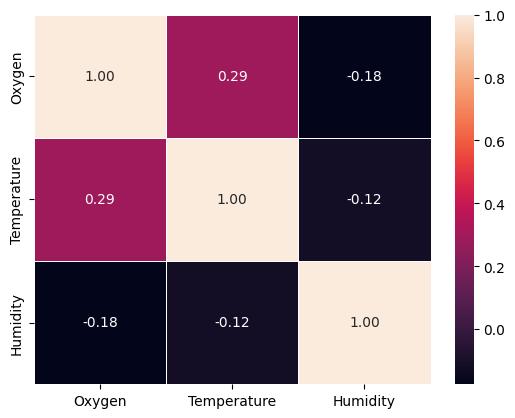

In [9]:
sb.heatmap(X.corr(method='pearson'), xticklabels=X.corr().columns, yticklabels=X.corr().columns,annot=True,fmt=".2f",linewidth=.5)
plt.show()

### Model Building

#### K-Neighbors Classifier

In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")

Predicted Accuracy: 75.0%


Prediction

In [11]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

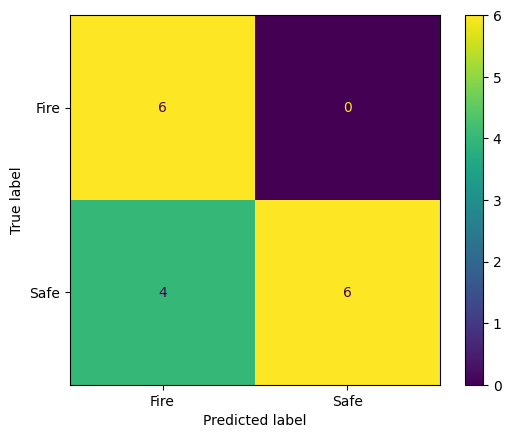

In [12]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Decision Tree Classifier

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")

Predicted Accuracy: 81.2%


Predict

In [14]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

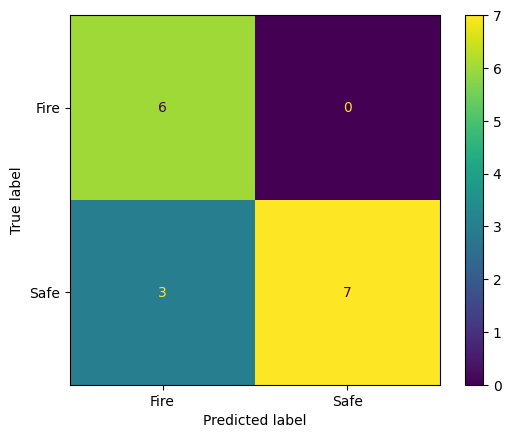

In [15]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Random Forest Classifier

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(2)*100}%")

Predicted Accuracy: 100.0%


Predict

In [17]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

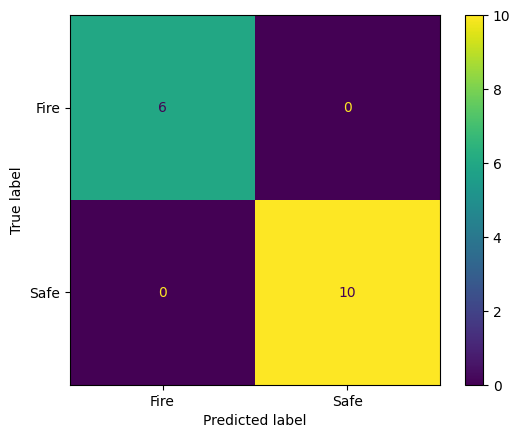

In [18]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

### Pickling

In [19]:
import pickle
with open('fire/model','wb') as f:
    pickle.dump(model,f)